In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [214]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv'
df = pd.read_csv(url)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [215]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

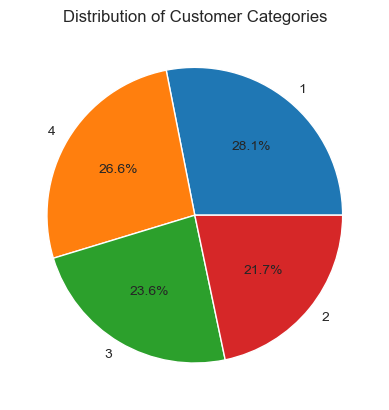

In [216]:
sizes = df.custcat.value_counts().values
fig, ax = plt.subplots()
ax.pie(sizes, labels=df.custcat.unique(), autopct='%1.1f%%')
ax.set_title('Distribution of Customer Categories')
plt.show()

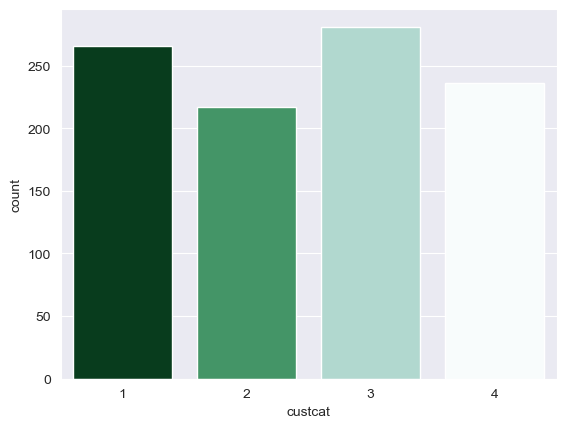

In [217]:
sns.countplot(x='custcat', data=df, palette='BuGn_r', hue='custcat', legend=False)
plt.show()

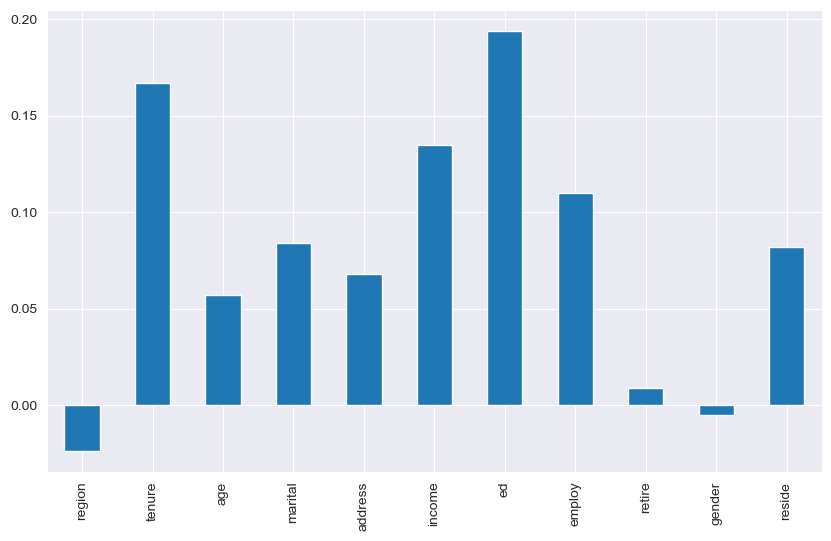

In [218]:
correlations = df.corr()['custcat'].drop('custcat')
correlations.plot(kind='bar', figsize=(10,6))
plt.show()

In [219]:
values_to_drop = correlations.sort_values(ascending=True)[:-4]
df = df.drop(columns=values_to_drop.index, axis=1)
df

,tenure,income,ed,employ,custcat
0,13,64.0,4,5,1
1,11,136.0,5,5,4
2,68,116.0,1,29,3
3,33,33.0,2,0,1
4,23,30.0,1,2,3
...,...,...,...,...,...
995,10,27.0,3,0,1
996,7,22.0,5,5,1
997,67,944.0,5,33,4
998,70,87.0,2,22,3


In [220]:
dummie_cols = []
for col in df.drop(columns=['custcat']).columns:
    print(f'{col}: {df[col].unique()}')
    if df[col].unique().size < 8 and df[col].unique().size > 2:
        dummie_cols.append(col)
dummie_cols

tenure: [13 11 68 33 23 41 45 38  5  7 57  9 29 60 34  1 26  6 53 55 14 42 25 56
 71 35 20 54 44 72 10 15 27 64 65 49 47 30 52 36 58 69 28 16  3 40 48  8
 67  2 31 62  4 17 43 12 61 59 51 19 22 70 50 46 39 24 21 18 63 37 66 32]
income: [  64.  136.  116.   33.   30.   78.   19.   76.  166.   72.  125.   80.
   37.  115.   25.   75.  162.   49.   20.   77.   16.  120.  101.   67.
   36.   31.   17.  155.  140.   55.  163.   52.  211.  186.   39.   22.
   29.   23.   62.   74.   63.   27.   24.   26.   47.   94.   21.  127.
  137.  438.   79.   40.   51.   61.   44.  110.   91.   46.   85.   10.
  244.   83.  351.  169.   34.   50.  161.  212.   53.   73.  107.  173.
   41.  105.  102.   68.   48.   28.  131.   18.   38.   60.   13.   98.
  195.   65.  150.  106.   96.  145.   99.   57.   56.  108.  242.  123.
   81.   86.   59.  112.  168.  167.  104.   43.   32.   58.   95.  114.
  128.  460.  224.  122.  191.  187.  119.   15.  674.  250.  200.   70.
  172.   45.   54.  142.   42.  13

['ed']

In [221]:
df = pd.get_dummies(data=df, columns=dummie_cols, drop_first=True)
df

,tenure,income,employ,custcat,ed_2,ed_3,ed_4,ed_5
0,13,64.0,5,1,False,False,True,False
1,11,136.0,5,4,False,False,False,True
2,68,116.0,29,3,False,False,False,False
3,33,33.0,0,1,True,False,False,False
4,23,30.0,2,3,False,False,False,False
...,...,...,...,...,...,...,...,...
995,10,27.0,0,1,False,True,False,False
996,7,22.0,5,1,False,False,False,True
997,67,944.0,33,4,False,False,False,True
998,70,87.0,22,3,True,False,False,False


In [222]:
X = df.drop('custcat', axis=1)
X = StandardScaler().fit_transform(X)

y = df['custcat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

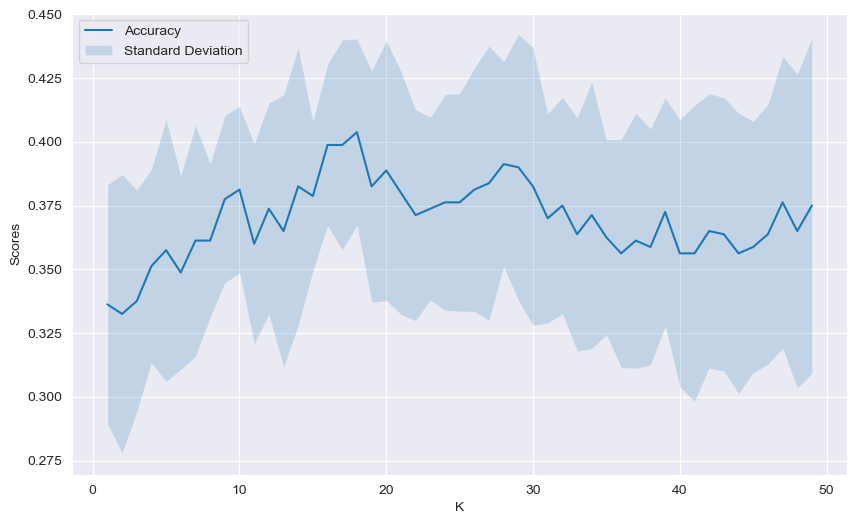

In [223]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits=10)
scores = {}
max_k = 50
for k in range(1, max_k):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    temp_scores = cross_val_score(knn_temp, X_train, y_train, cv=k_folds)
    scores[k] = [temp_scores.mean(), temp_scores.std()]

accuracies = np.asarray([acc[0] for acc in scores.values()])
stds = np.asarray([acc[1] for acc in scores.values()])
plt.figure(figsize=(10,6))
plt.plot(scores.keys(), accuracies)
plt.fill_between(range(1, max_k), accuracies - stds, accuracies + stds, alpha=0.2)
plt.xlabel('K')
plt.ylabel('Scores')
plt.legend(('Accuracy', 'Standard Deviation'))
plt.show()

In [224]:
list_of_scores = list(scores.values())
list_of_k = list(scores.keys())
optimal_k = list_of_scores.index(max(list_of_scores))
print(f'Optimal k is {list_of_k[optimal_k]}')
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

Optimal k is 18
MSE: 1.925
Accuracy: 0.41


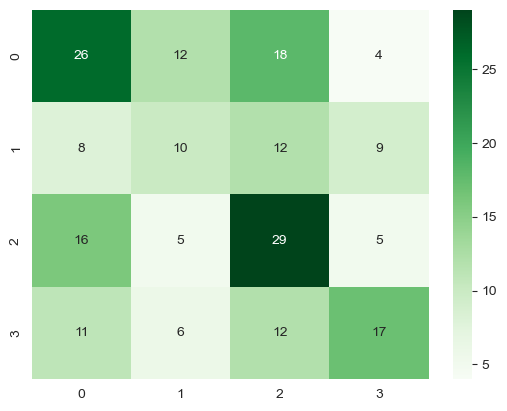

In [225]:
conf_matr = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matr, cmap='Greens', annot=True)
plt.show()

In [226]:
metrics.classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           1       0.43      0.43      0.43        60\n           2       0.30      0.26      0.28        39\n           3       0.41      0.53      0.46        55\n           4       0.49      0.37      0.42        46\n\n    accuracy                           0.41       200\n   macro avg       0.41      0.40      0.40       200\nweighted avg       0.41      0.41      0.41       200\n'